In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import ufloat

data= "Data/24-08-30-19-15.txt"
data = pd.read_csv(data, sep=" ")


data2= "Data/24-08-29-19-54.txt"
data2= pd.read_csv(data2, sep=" ")       





print(data)

        40000  1725063341
0       40000  1725063342
1       40007  1725063343
2       40006  1725063344
3       40010  1725063345
4       40009  1725063346
...       ...         ...
248025  40002  1725304274
248026  40009  1725304275
248027  40000  1725304276
248028  40000  1725304277
248029  40000  1725304278

[248030 rows x 2 columns]


In [8]:
Decay_times=data.iloc[:,0]
Decay_times2=data2.iloc[:,0]

In [9]:
Decay_times

0         40000
1         40007
2         40006
3         40010
4         40009
          ...  
248025    40002
248026    40009
248027    40000
248028    40000
248029    40000
Name: 40000, Length: 248030, dtype: int64

In [10]:
Decay_times=np.sort(Decay_times)
Decay_times2=np.sort(Decay_times2)

In [11]:
Decay_times

array([   40,    40,    40, ..., 40029, 40050, 40139], dtype=int64)

In [12]:
filter_i=0
for i in range(len(Decay_times)):
    
    if  Decay_times[i]>= 40000:
        
        filter_i=i
        
        break
        

print(filter_i)


filter_i2=0
for i2 in range(len(Decay_times2)):
    
    if  Decay_times2[i2]>= 40000:
        
        filter_i2=i2
        
        break
        

print(filter_i2)

7171
2056


In [13]:
Decay_Filtered=Decay_times[0:filter_i-1] /1000
Decay_Filtered2=Decay_times2[0:filter_i2-1] /1000

print(Decay_Filtered)

[ 0.04  0.04  0.04 ... 19.76 19.8  19.94]


In [14]:
N_muons=(len(Decay_Filtered))
N_muons

N_muons2=(len(Decay_Filtered2))
N_muons2

2055

In [158]:
hist, bin_edges = np.histogram(Decay_Filtered,bins=30)
hist2, bin_edges2 = np.histogram(Decay_Filtered2,bins=30)

In [159]:
hist,bin_edges

(array([1982, 1345, 1018,  719,  534,  421,  286,  191,  164,  106,   87,
          57,   46,   29,   18,   32,   22,   19,   14,   12,   14,    6,
           6,    7,    2,    8,    2,   10,    5,    8], dtype=int64),
 array([ 0.04      ,  0.70333333,  1.36666667,  2.03      ,  2.69333333,
         3.35666667,  4.02      ,  4.68333333,  5.34666667,  6.01      ,
         6.67333333,  7.33666667,  8.        ,  8.66333333,  9.32666667,
         9.99      , 10.65333333, 11.31666667, 11.98      , 12.64333333,
        13.30666667, 13.97      , 14.63333333, 15.29666667, 15.96      ,
        16.62333333, 17.28666667, 17.95      , 18.61333333, 19.27666667,
        19.94      ]))

In [160]:
Decay_Filter_pd=pd.DataFrame(Decay_Filtered)

2.3192947466294744

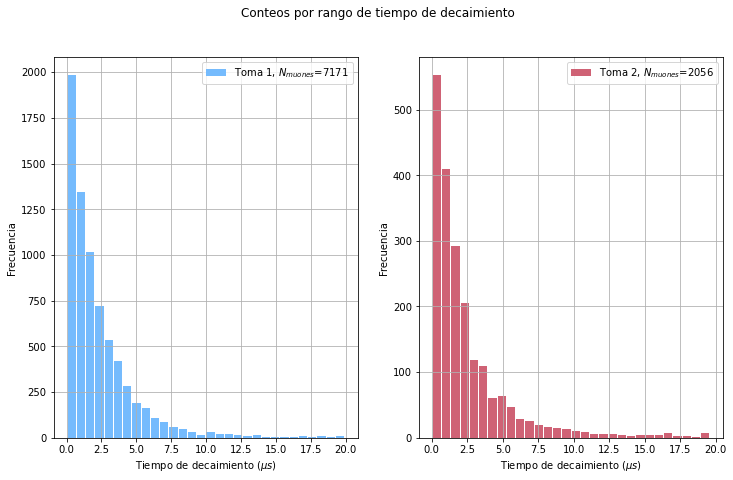

In [161]:
Muon_counts=[Decay_Filtered,Decay_Filtered2]

fig, (ax1,ax2) =plt.subplots(1,2,figsize=(12,7))
ax1.hist(Decay_Filtered, bins=30,fill=True,rwidth=0.9,label="Toma 1, $N_{muones}$=7171",color="xkcd:sky blue")
ax1.legend()
ax1.set_xlabel("Tiempo de decaimiento ($\mu s$)")
ax1.set_ylabel("Frecuencia")
ax1.grid()


ax2.hist(Decay_Filtered2, bins=30,fill=True,rwidth=0.9,label="Toma 2, $N_{muones}$=2056",color="xkcd:rose")
ax2.legend()
ax2.set_xlabel("Tiempo de decaimiento ($\mu s$)")
ax2.set_ylabel("Frecuencia")
ax2.grid()

plt.suptitle("Conteos por rango de tiempo de decaimiento")

plt.savefig("Histograma.pdf",format="pdf")

bin_pos=[]
for i in range(1,len(bin_edges)):
       bin_pos.append((bin_edges[i]+bin_edges[i-1])/2) 
        
mean=np.sum(hist*bin_pos)/N_muons
mean





In [162]:
N_t=N_muons-np.cumsum(hist)
N_t=np.append(N_muons,N_t)
N_t
bin_edges[0]=0


N_t2=N_muons2-np.cumsum(hist2)
N_t2=np.append(N_muons2,N_t2)
N_t2
bin_edges2[0]=0




C:\Users\THINKB~1\AppData\Local\Temp/ipykernel_6788/3630733460.py:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*X)+D
C:\Users\THINKB~1\AppData\Local\Temp/ipykernel_6788/3630733460.py:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*X)+D


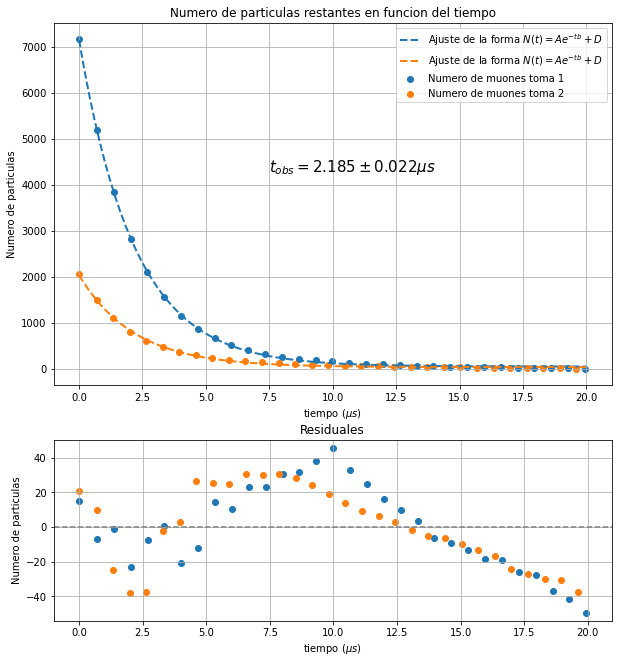

In [184]:
def fit_exp(X,a,b,D):
    return a*np.exp(-b*X)+D


fig2,(ax3,ax4)=plt.subplots(2,1,figsize=(10,11),gridspec_kw={'height_ratios': [2, 1]})

popt, pcov = curve_fit(fit_exp,bin_edges,N_t,maxfev=1000)
x=np.linspace(0,20,100)
ax3.plot(x, fit_exp(x,*popt), linewidth=2, label="Ajuste de la forma $N(t)=Ae^{-tb}+D$",ls="--")
ax3.scatter(bin_edges,N_t,label="Numero de muones toma 1")

popt2, pcov2 = curve_fit(fit_exp,bin_edges2,N_t2,maxfev=1000)
x=np.linspace(0,20,100)
ax3.plot(x, fit_exp(x,*popt2), linewidth=2, label="Ajuste de la forma $N(t)=Ae^{-tb}+D$",ls="--")
ax3.scatter(bin_edges2,N_t2,label="Numero de muones toma 2")
ax3.text(x=7.5, y=4300 ,s="$t_{obs}=2.185 \pm 0.022 \mu s$" ,size=15)

Residuals1=N_t-fit_exp(bin_edges,*popt)
ax4.scatter(bin_edges,Residuals1)

Residuals2=N_t2-fit_exp(bin_edges2,*popt2)
ax4.scatter(bin_edges2,Residuals2)

ax4.axhline(y=0,ls="--",c="gray")

ax3.set_title("Numero de particulas restantes en funcion del tiempo")
ax4.set_title("Residuales")

ax3.set_xlabel("tiempo ($\mu s$)")
ax4.set_xlabel("tiempo ($\mu s$)")


ax3.set_ylabel("Numero de particulas")
ax4.set_ylabel("Numero de particulas")
ax3.grid()
ax4.grid()
ax3.legend()


plt.savefig("MuonDecay.pdf",format="pdf")



In [185]:
popt
b1=ufloat(popt[1],np.sqrt(pcov[1,1]))
b2=ufloat(popt2[1],np.sqrt(pcov2[1,1]))


In [186]:
np.sqrt(pcov[1,1])

0.002657984158581486

In [187]:
t_obs1=1/b1
t_obs2=1/b2
print(t_obs1,t_obs2)

2.179+/-0.013 2.19+/-0.04


In [188]:
print(np.mean([t_obs1,t_obs2]))

2.185+/-0.022


In [189]:
popt,popt2

(array([7.10631694e+03, 4.58876595e-01, 4.86455600e+01]),
 array([1.99672324e+03, 4.56544113e-01, 3.74913067e+01]))

C:\Users\THINKB~1\AppData\Local\Temp/ipykernel_6788/3375973981.py:5: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*X)
C:\Users\THINKB~1\AppData\Local\Temp/ipykernel_6788/3375973981.py:5: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*X)


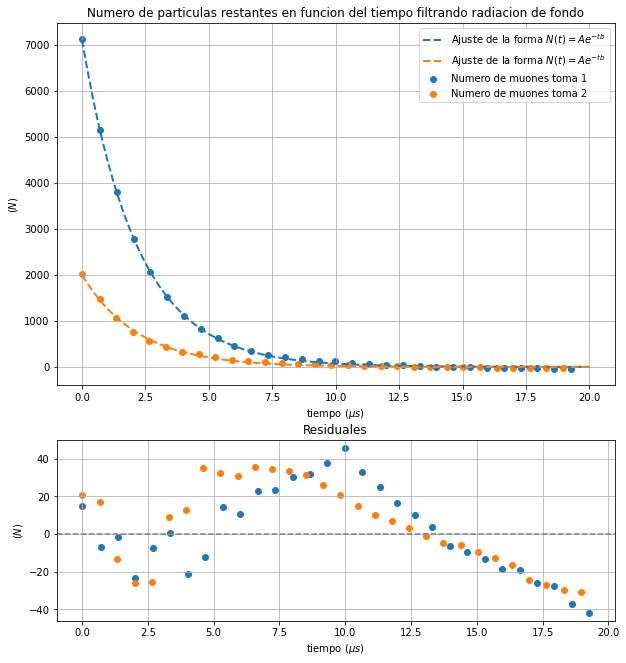

In [202]:
def fit_lin(X,m,c):
    return m*X+c

def fit_exp2(X,a,b):
    return a*np.exp(-b*X)

fil1=(N_t[:-1]-popt[2])
fil2=(N_t2[:-1]-popt2[2])
fig3,(ax5,ax6)=plt.subplots(2,1,figsize=(10,11),gridspec_kw={'height_ratios': [2, 1]})

poptf, pcovf = curve_fit(fit_exp2,bin_edges[:-1],fil1,maxfev=2000)
x=np.linspace(0,20,100)
ax5.plot(x, fit_exp2(x,*poptf), linewidth=2, label="Ajuste de la forma $N(t)=Ae^{-tb}$",ls="--")
ax5.scatter(bin_edges[:-1],fil1,label="Numero de muones toma 1")

popt2f, pcov2f = curve_fit(fit_exp2,bin_edges2[:-1],fil2,maxfev=1000)
x=np.linspace(0,20,100)
ax5.plot(x, fit_exp2(x,*popt2f), linewidth=2, label="Ajuste de la forma $N(t)=Ae^{-tb}$",ls="--")
ax5.scatter(bin_edges2[:-1],fil2,label="Numero de muones toma 2")


Residuals1l=fil1-fit_exp2(bin_edges[:-1],*poptf)
ax6.scatter(bin_edges[:-1],Residuals1l)

Residuals2l=fil2-fit_exp2(bin_edges[:-1],*popt2f)
ax6.scatter(bin_edges2[:-1],Residuals2l)
ax6.axhline(y=0,ls="--",c="gray")

ax5.set_title("Numero de particulas restantes en funcion del tiempo filtrando radiacion de fondo")
ax6.set_title("Residuales")

ax5.set_xlabel("tiempo ($\mu s$)")
ax6.set_xlabel("tiempo ($\mu s$)")


ax5.set_ylabel("$(N)$")
ax6.set_ylabel("$(N)$")
ax5.grid()
ax6.grid()
ax5.legend()



plt.savefig("MuonDecaybackgroud.pdf",format="pdf")



In [191]:
b1f=ufloat(poptf[1],np.sqrt(pcovf[1,1]))
b2f=ufloat(popt2f[1],np.sqrt(pcov2f[1,1]))
t_obsf=1/b1f
t_obs2f=1/b2f
print(t_obsf,t_obs2f)
print(np.mean([t_obsf,t_obs2f]))


2.179+/-0.010 2.190+/-0.034
2.185+/-0.018


In [192]:
poptl

array([7.10628710e+03, 4.58870914e-01])

array([ 1.00211608e+00,  7.23209292e-01,  5.33941066e-01,  3.90688237e-01,
        2.89510651e-01,  2.14366240e-01,  1.55123174e-01,  1.14877291e-01,
        8.79997959e-02,  6.49217371e-02,  5.00054308e-02,  3.77628021e-02,
        2.97417694e-02,  2.32686554e-02,  1.91877791e-02,  1.66548215e-02,
        1.21517856e-02,  9.05594846e-03,  6.38227092e-03,  4.41219273e-03,
        2.72355429e-03,  7.53476100e-04, -9.08431239e-05, -9.35162347e-04,
       -1.92020144e-03, -2.20164118e-03, -3.32740015e-03, -3.60883989e-03,
       -5.01603859e-03, -5.71963795e-03])

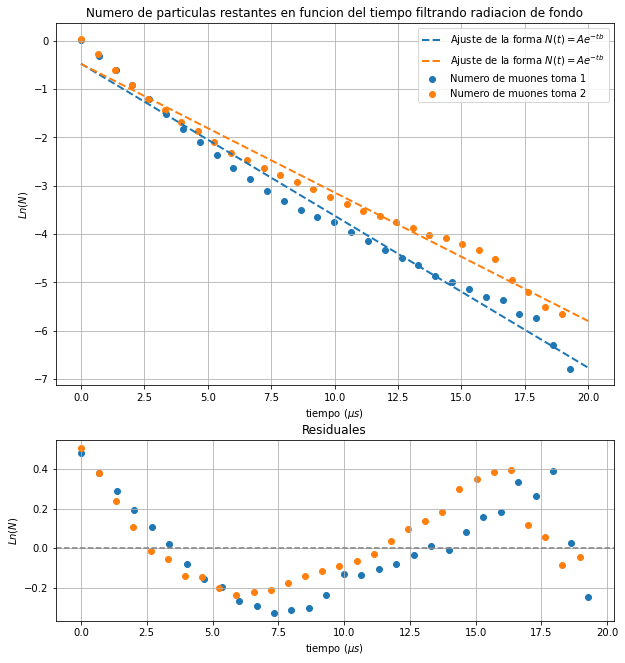

In [200]:

lin1=np.log(N_t[:-1]/popt[0])
lin2=np.log(N_t2[:-1]/popt2[0])
fig3,(ax7,ax8)=plt.subplots(2,1,figsize=(10,11),gridspec_kw={'height_ratios': [2, 1]})

poptl, pcovl = curve_fit(fit_lin,bin_edges[:-1],lin1,maxfev=2000)
x=np.linspace(0,20,100)
ax7.plot(x, fit_lin(x,*poptl), linewidth=2, label="Ajuste de la forma $ln(N(t))=mx+b$",ls="--")
ax7.scatter(bin_edges[:-1],lin1,label="Numero de muones toma 1")

popt2l, pcov2l = curve_fit(fit_lin,bin_edges2[:-1],lin2,maxfev=1000)
x=np.linspace(0,20,100)
ax7.plot(x, fit_lin(x,*popt2l), linewidth=2, label="Ajuste de la forma $ln(N(t))=mx+b$",ls="--")
ax7.scatter(bin_edges2[:-1],lin2,label="Numero de muones toma 2")


Residuals1l=lin1-fit_lin(bin_edges[:-1],*poptl)
ax8.scatter(bin_edges[:-1],Residuals1l)

Residuals2l=lin2-fit_lin(bin_edges[:-1],*popt2l)
ax8.scatter(bin_edges2[:-1],Residuals2l)
ax8.axhline(y=0,ls="--",c="gray")

ax7.set_title("Numero de particulas restantes en funcion del tiempo linealiza")
ax8.set_title("Residuales")

ax7.set_xlabel("tiempo ($\mu s$)")
ax8.set_xlabel("tiempo ($\mu s$)")


ax7.set_ylabel("$Ln(N)$")
ax8.set_ylabel("$Ln(N)$")
ax7.grid()
ax8.grid()
ax7.legend()



plt.savefig("MuonDecaylin.pdf",format="pdf")

